2. You work for a consumer finance company which specializes in lending loans to urban customers. When the company receives a loan application, the company has to make a decision for loan approval based on the applicant’s profile.The data given below contains the information about past loan applicants and whether they ‘defaulted’4 or not. The aim is to identify patterns which indicate if a person is likely to default, which may be used for taking actions such as denying the loan, reducing the amount of loan, lending (to risky applicants) at a higher interest rate, etc.
Perform Multinomial regression on the dataset in which loan_status is the output (Y) variable and it has three levels in it. 

In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_rows', 600)
pd.set_option('display.max_columns', 600)
pd.set_option('display.width', 1200)

In [2]:
# Importing dataset
data = pd.read_csv('C:/Users/vaibh/Desktop/360 Digitmg/Multi Nomial Regression/Assignments/loan.csv', low_memory=False)
data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,NaN,3,0,13648,83.70%,9,f,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,5,NaN,NaN,3,0,1687,9.40%,4,f,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,NaN,NaN,2,0,2956,98.50%,10,f,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0,Feb-96,1,35.0,NaN,10,0,5598,21%,37,f,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,NaN,Apr-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

In [3]:
# Dimensions of the dataset
data.shape

(39717, 111)

In [4]:
# Checking for null values 
data.isnull().sum().sort_values(ascending=False)

verification_status_joint         39717
annual_inc_joint                  39717
mo_sin_old_rev_tl_op              39717
mo_sin_old_il_acct                39717
bc_util                           39717
bc_open_to_buy                    39717
avg_cur_bal                       39717
acc_open_past_24mths              39717
inq_last_12m                      39717
total_cu_tl                       39717
inq_fi                            39717
total_rev_hi_lim                  39717
all_util                          39717
max_bal_bc                        39717
open_rv_24m                       39717
open_rv_12m                       39717
il_util                           39717
total_bal_il                      39717
mths_since_rcnt_il                39717
open_il_24m                       39717
open_il_12m                       39717
open_il_6m                        39717
open_acc_6m                       39717
tot_cur_bal                       39717
tot_coll_amt                      39717


In [5]:
# Analyzing the null value columns

null_col = []
for i in data.columns:
    temp = data[i].isnull().sum()/data.shape[0]
    if temp > 0.6:
        null_col.append(i)

print (len(null_col))
print(null_col)

57
['mths_since_last_delinq', 'mths_since_last_record', 'next_pymnt_d', 'mths_since_last_major_derog', 'annual_inc_joint', 'dti_joint', 'verification_status_joint', 'tot_coll_amt', 'tot_cur_bal', 'open_acc_6m', 'open_il_6m', 'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il', 'total_bal_il', 'il_util', 'open_rv_12m', 'open_rv_24m', 'max_bal_bc', 'all_util', 'total_rev_hi_lim', 'inq_fi', 'total_cu_tl', 'inq_last_12m', 'acc_open_past_24mths', 'avg_cur_bal', 'bc_open_to_buy', 'bc_util', 'mo_sin_old_il_acct', 'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl', 'mort_acc', 'mths_since_recent_bc', 'mths_since_recent_bc_dlq', 'mths_since_recent_inq', 'mths_since_recent_revol_delinq', 'num_accts_ever_120_pd', 'num_actv_bc_tl', 'num_actv_rev_tl', 'num_bc_sats', 'num_bc_tl', 'num_il_tl', 'num_op_rev_tl', 'num_rev_accts', 'num_rev_tl_bal_gt_0', 'num_sats', 'num_tl_120dpd_2m', 'num_tl_30dpd', 'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'pct_tl_nvr_dlq', 'percent_bc_gt_75', 'tot_hi_c

    These 57 null columns can be dropped from the dataset

In [6]:
# Dropping columns
data.drop(null_col, axis = 1, inplace=True)

In [7]:
data.shape

(39717, 54)

In [8]:
# Checking unique values for the features

print(data.pymnt_plan.unique())
print(data.initial_list_status.unique())
print(data.application_type.unique())

['n']
['f']
['INDIVIDUAL']


    These features can be removed

In [9]:
# Dropping irrelevant features
irre_cols = ['id', 'member_id', 'emp_title', 'url', 'desc', 'zip_code', 'purpose', \
             'title', 'addr_state', 'issue_d', 'earliest_cr_line', 'last_credit_pull_d', 'last_pymnt_d','grade',\
            'pymnt_plan', 'initial_list_status', 'application_type','total_pymnt_inv']
data.drop(irre_cols, axis = 1, inplace=True)

In [10]:
# Percentage of null values in remaining dataset
for i in data.columns:
    if data[i].isnull().sum() != 0:
        print(f'{i} ({np.dtype(data[i])}):    {(data[i].isnull().sum()/data.shape[0])*100}')

emp_length (object):    2.7066495455346575
revol_util (object):    0.12589067653649572
collections_12_mths_ex_med (float64):    0.1409975577208752
chargeoff_within_12_mths (float64):    0.1409975577208752
pub_rec_bankruptcies (float64):    1.7549160309187504
tax_liens (float64):    0.09819472769846666


In [11]:
# Replacing nan with mean,median, mode

data.emp_length = data.emp_length.fillna('10+ years')
data.revol_util = data.revol_util.fillna(' 0%')
data.collections_12_mths_ex_med = data.collections_12_mths_ex_med.fillna(data.collections_12_mths_ex_med.median())
data.chargeoff_within_12_mths = data.chargeoff_within_12_mths.fillna(data.chargeoff_within_12_mths.median())
data.pub_rec_bankruptcies = data.pub_rec_bankruptcies.fillna(data.pub_rec_bankruptcies.median())
data.tax_liens = data.tax_liens.fillna(data.tax_liens.median())

In [12]:
# Checking for duplicated values 
data.duplicated().sum()

0

    There are no duplicated rows

In [13]:
# Descriptive Statistics
data.describe()

,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,policy_code,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
count,39717.000000,39717.000000,39717.000000,39717.000000,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.0,39717.0,39717.0,39717.0,39717.0,39717.000000,39717.0
mean,11219.443815,10947.713196,10397.448868,324.561922,6.896893e+04,13.315130,0.146512,0.869200,9.294408,0.055065,13382.528086,22.088828,51.227887,50.989768,12153.596544,9793.348813,2263.663172,1.363015,95.221624,12.406112,2678.826162,0.0,1.0,0.0,0.0,0.0,0.042501,0.0
std,7456.670694,7187.238670,7128.450439,208.874874,6.379377e+04,6.678594,0.491812,1.070219,4.400282,0.237200,15885.016641,11.401709,375.172839,373.824457,9042.040766,7065.522127,2608.111964,7.289979,688.744771,148.671593,4447.136012,0.0,0.0,0.0,0.0,0.0,0.202603,0.0
min,500.000000,500.000000,0.000000,15.690000,4.000000e+03,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.0,0.0,0.0,0.0,0.000000,0.0
25%,5500.000000,5400.000000,5000.000000,167.020000,4.040400e+04,8.170000,0.000000,0.000000,6.000000,0.000000,3703.000000,13.000000,0.000000,0.000000,5576.930000,4600.000000,662.180000,0.000000,0.000000,0.000000,218.680000,0.0,1.0,0.0,0.0,0.0,0.000000,0.0
50%,10000.000000,9600.000000,8975.000000,280.220000,5.900000e+04,13.400000,0.000000,1.000000,9.000000,0.000000,8850.000000,20.000000,0.000000,0.000000,9899.640319,8000.000000,1348.910000,0.000000,0.000000,0.000000,546.140000,0.0,1.0,0.0,0.0,0.0,0.000000,0.0
75%,15000.000000,15000.000000,14400.000000,430.780000,8.230000e+04,18.600000,0.000000,1.000000,12.000000,0.000000,17058.000000,29.000000,0.000000,0.000000,16534.433040,13653.260000,2833.400000,0.000000,0.000000,0.000000,3293.160000,0.0,1.0,0.0,0.0,0.0,0.000000,0.0
max,35000.000000,35000.000000,35000.000000,1305.190000,6.000000e+06,29.990000,11.000000,8.000000,44.000000,4.000000,149588.000000,90.000000,6311.470000,6307.370000,58563.679930,35000.020000,23563.680000,180.200000,29623.350000,7002.190000,36115.200000,0.0,1.0,0.0,0.0,0.0,2.000000,0.0


In [14]:
# Checking datatypes 

data.info('all')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 36 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   loan_amnt                   39717 non-null  int64  
 1   funded_amnt                 39717 non-null  int64  
 2   funded_amnt_inv             39717 non-null  float64
 3   term                        39717 non-null  object 
 4   int_rate                    39717 non-null  object 
 5   installment                 39717 non-null  float64
 6   sub_grade                   39717 non-null  object 
 7   emp_length                  39717 non-null  object 
 8   home_ownership              39717 non-null  object 
 9   annual_inc                  39717 non-null  float64
 10  verification_status         39717 non-null  object 
 11  loan_status                 39717 non-null  object 
 12  dti                         39717 non-null  float64
 13  delinq_2yrs                 397

In [15]:
data.head(5)

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,sub_grade,emp_length,home_ownership,annual_inc,verification_status,loan_status,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,policy_code,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,5000,5000,4975.0,36 months,10.65%,162.87,B2,10+ years,RENT,24000.0,Verified,Fully Paid,27.65,0,1,3,0,13648,83.70%,9,0.00,0.00,5863.155187,5000.00,863.16,0.00,0.00,0.00,171.62,0.0,1,0,0.0,0,0.0,0.0
1,2500,2500,2500.0,60 months,15.27%,59.83,C4,< 1 year,RENT,30000.0,Source Verified,Charged Off,1.00,0,5,3,0,1687,9.40%,4,0.00,0.00,1008.710000,456.46,435.17,0.00,117.08,1.11,119.66,0.0,1,0,0.0,0,0.0,0.0
2,2400,2400,2400.0,36 months,15.96%,84.33,C5,10+ years,RENT,12252.0,Not Verified,Fully Paid,8.72,0,2,2,0,2956,98.50%,10,0.00,0.00,3005.666844,2400.00,605.67,0.00,0.00,0.00,649.91,0.0,1,0,0.0,0,0.0,0.0
3,10000,10000,10000.0,36 months,13.49%,339.31,C1,10+ years,RENT,49200.0,Source Verified,Fully Paid,20.00,0,1,10,0,5598,21%,37,0.00,0.00,12231.890000,10000.00,2214.92,16.97,0.00,0.00,357.48,0.0,1,0,0.0,0,0.0,0.0
4,3000,3000,3000.0,60 months,12.69%,67.79,B5,1 year,RENT,80000.0,Source Verified,Current,17.94,0,0,15,0,27783,53.90%,38,524.06,524.06,3513.330000,2475.94,1037.39,0.00,0.00,0.00,67.79,0.0,1,0,0.0,0,0.0,0.0


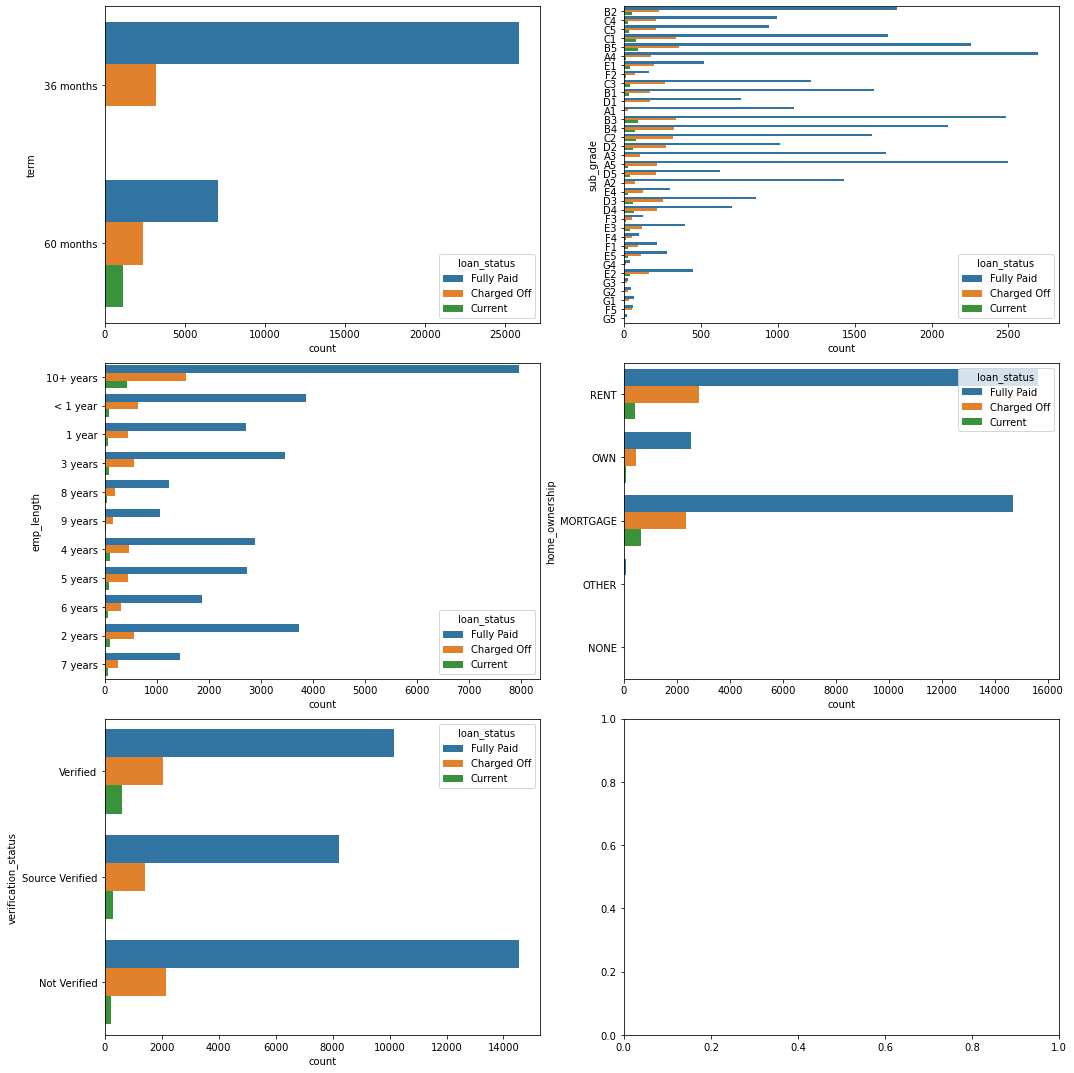

In [16]:
# Countplot for categorical features

fig, axes = plt.subplots(3,2,figsize=(15,15))
axes = axes.flatten()
index = 0
cols_list = ['term', 'sub_grade', 'emp_length', 'home_ownership', 'verification_status']
for i in cols_list:
    sns.countplot(y = data[i], hue = data.loan_status, ax=axes[index])
    index += 1
plt.tight_layout(w_pad = 0.5, h_pad = 0.5, pad = 1)

    Customers have mostly choosed a term period 36months
    Maximum number of customers belong to sugrade A4, B3 and A5
    Employement length of the majority of customers is 10+ years
    Large percentage of the customers have fully paid their previous loan amount
    Customers appyling for loan live on a rently basis or have mortage
    Independent of verification status, customers have mostly paid off the previous loan
    Such customers can be lent loans

<AxesSubplot:ylabel='loan_status'>

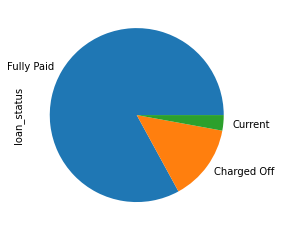

In [17]:
# Pieplot of target variable
data.loan_status.value_counts().plot.pie()

In [18]:
# Converting categorical to numerical features

from sklearn.preprocessing import LabelEncoder   # importing labelencoder for ordinal data

data.term = data.term.map({' 36 months': 0, ' 60 months': 1})

data.int_rate = (data.int_rate.apply(lambda x: x.replace('%',''))).astype('float64')

data.sub_grade = LabelEncoder().fit_transform(data.sub_grade)

data.emp_length = data.emp_length.map({'< 1 year':0, '1 year': 1, '2 years': 2, '3 years': 3, '4 years': 4, '5 years': 5,\
                     '6 years': 6, '7 years': 7, '8 years': 8, '9 years': 9, '10+ years': 10})

data.verification_status = data.verification_status.map({'Not Verified':0,'Source Verified':1, 'Verified':2})

data.revol_util = (data.revol_util.apply(lambda x: x.replace('%',''))).astype('float64')

data.loan_status = data.loan_status.map({'Charged Off':0, 'Current':1, 'Fully Paid':2})

data = pd.get_dummies(columns=['home_ownership'], drop_first=True, data =data) # Using getdummies for nominal data

In [19]:
data.head(15)

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,sub_grade,emp_length,annual_inc,verification_status,loan_status,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,policy_code,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT
0,5000,5000,4975.0,0,10.65,162.87,6,10,24000.0,2,2,27.65,0,1,3,0,13648,83.7,9,0.00,0.00,5863.155187,5000.00,863.16,0.00,0.00,0.0000,171.62,0.0,1,0,0.0,0,0.0,0.0,0,0,0,1
1,2500,2500,2500.0,1,15.27,59.83,13,0,30000.0,1,0,1.00,0,5,3,0,1687,9.4,4,0.00,0.00,1008.710000,456.46,435.17,0.00,117.08,1.1100,119.66,0.0,1,0,0.0,0,0.0,0.0,0,0,0,1
2,2400,2400,2400.0,0,15.96,84.33,14,10,12252.0,0,2,8.72,0,2,2,0,2956,98.5,10,0.00,0.00,3005.666844,2400.00,605.67,0.00,0.00,0.0000,649.91,0.0,1,0,0.0,0,0.0,0.0,0,0,0,1
3,10000,10000,10000.0,0,13.49,339.31,10,10,49200.0,1,2,20.00,0,1,10,0,5598,21.0,37,0.00,0.00,12231.890000,10000.00,2214.92,16.97,0.00,0.0000,357.48,0.0,1,0,0.0,0,0.0,0.0,0,0,0,1
4,3000,3000,3000.0,1,12.69,67.79,9,1,80000.0,1,1,17.94,0,0,15,0,27783,53.9,38,524.06,524.06,3513.330000,2475.94,1037.39,0.00,0.00,0.0000,67.79,0.0,1,0,0.0,0,0.0,0.0,0,0,0,1
5,5000,5000,5000.0,0,7.90,156.46,3,3,36000.0,1,2,11.20,0,3,9,0,7963,28.3,12,0.00,0.00,5632.210000,5000.00,632.21,0.00,0.00,0.0000,161.03,0.0,1,0,0.0,0,0.0,0.0,0,0,0,1
6,7000,7000,7000.0,1,15.96,170.08,14,8,47004.0,0,2,23.51,0,1,7,0,17726,85.6,11,0.00,0.00,10110.840000,6985.61,3125.23,0.00,0.00,0.0000,1313.76,0.0,1,0,0.0,0,0.0,0.0,0,0,0,1
7,3000,3000,3000.0,0,18.64,109.43,20,9,48000.0,1,2,5.35,0,2,4,0,8221,87.5,4,0.00,0.00,3939.135294,3000.00,939.14,0.00,0.00,0.0000,111.34,0.0,1,0,0.0,0,0.0,0.0,0,0,0,1
8,5600,5600,5600.0,1,21.28,152.39,26,4,40000.0,1,0,5.55,0,2,11,0,5210,32.6,13,0.00,0.00,646.020000,162.02,294.94,0.00,189.06,2.0900,152.39,0.0,1,0,0.0,0,0.0,0.0,0,0,1,0
9,5375,5375,5350.0,1,12.69,121.45,9,0,15000.0,2,0,18.08,0,0,2,0,9279,36.5,3,0.00,0.00,1476.190000,673.48,533.42,0.00,269.29,2.5200,121.45,0.0,1,0,0.0,0,0.0,0.0,0,0,0,1


In [20]:
data.int_rate.groupby(data.loan_status).mean()

loan_status
0    13.820432
1    15.031465
2    11.609761
Name: int_rate, dtype: float64

    Customers with low interest rate have fully paid their previous loan

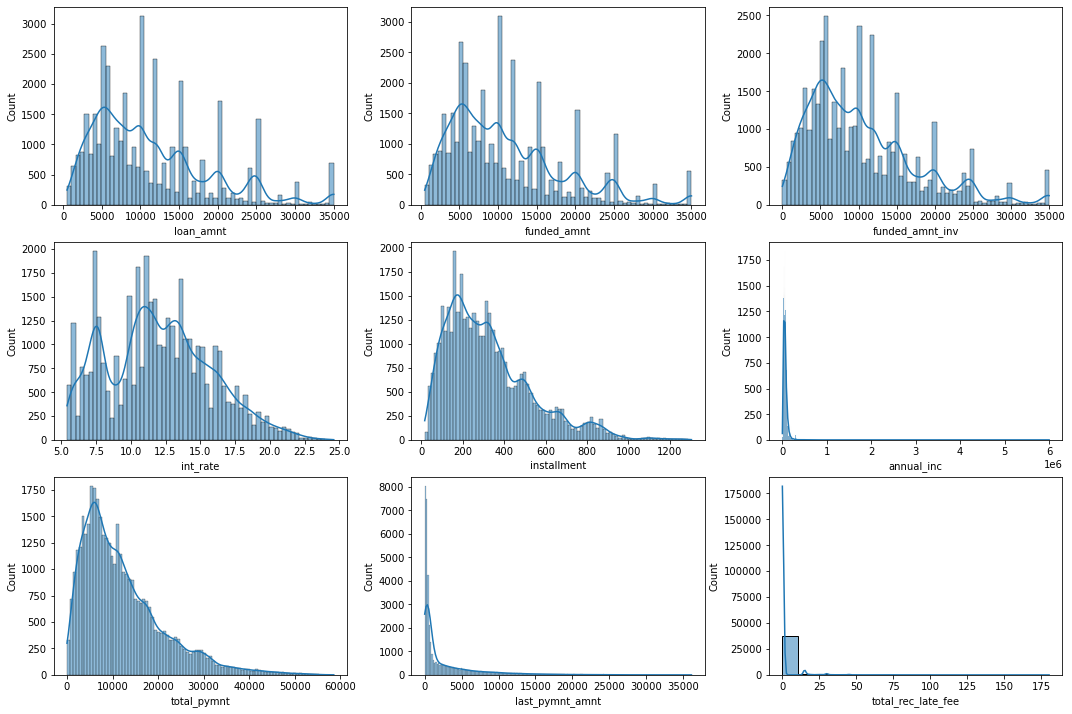

In [21]:
# Ditribution of the numerical features

fig, axes = plt.subplots(3,3,figsize=(15,10))
axes = axes.flatten()
index = 0
cols_list = ['loan_amnt', 'funded_amnt', 'funded_amnt_inv','int_rate','installment','annual_inc','total_pymnt'\
             ,'last_pymnt_amnt','total_rec_late_fee']
for i in cols_list:
    sns.histplot(x = data[i],kde=1, ax=axes[index])
    index += 1
plt.tight_layout(w_pad = 0.5, h_pad = 0.5, pad = 1)

In [22]:
# Eliminating low variance columns
from sklearn.feature_selection import VarianceThreshold

vt = VarianceThreshold(threshold=0.05)
vt_data = vt.fit_transform(data)
vt_data = pd.DataFrame(vt_data,columns=vt.get_feature_names_out())
vt_data

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,sub_grade,emp_length,annual_inc,verification_status,loan_status,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,home_ownership_OWN,home_ownership_RENT
0,5000.0,5000.0,4975.0,0.0,10.65,162.87,6.0,10.0,24000.0,2.0,2.0,27.65,0.0,1.0,3.0,0.0,13648.0,83.7,9.0,0.00,0.00,5863.155187,5000.00,863.16,0.00,0.00,0.00,171.62,0.0,1.0
1,2500.0,2500.0,2500.0,1.0,15.27,59.83,13.0,0.0,30000.0,1.0,0.0,1.00,0.0,5.0,3.0,0.0,1687.0,9.4,4.0,0.00,0.00,1008.710000,456.46,435.17,0.00,117.08,1.11,119.66,0.0,1.0
2,2400.0,2400.0,2400.0,0.0,15.96,84.33,14.0,10.0,12252.0,0.0,2.0,8.72,0.0,2.0,2.0,0.0,2956.0,98.5,10.0,0.00,0.00,3005.666844,2400.00,605.67,0.00,0.00,0.00,649.91,0.0,1.0
3,10000.0,10000.0,10000.0,0.0,13.49,339.31,10.0,10.0,49200.0,1.0,2.0,20.00,0.0,1.0,10.0,0.0,5598.0,21.0,37.0,0.00,0.00,12231.890000,10000.00,2214.92,16.97,0.00,0.00,357.48,0.0,1.0
4,3000.0,3000.0,3000.0,1.0,12.69,67.79,9.0,1.0,80000.0,1.0,1.0,17.94,0.0,0.0,15.0,0.0,27783.0,53.9,38.0,524.06,524.06,3513.330000,2475.94,1037.39,0.00,0.00,0.00,67.79,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,2500.0,2500.0,1075.0,0.0,8.07,78.42,3.0,4.0,110000.0,0.0,2.0,11.33,0.0,0.0,13.0,0.0,7274.0,13.1,40.0,0.00,0.00,2822.969293,2500.00,322.97,0.00,0.00,0.00,80.90,0.0,0.0
39713,8500.0,8500.0,875.0,0.0,10.28,275.38,10.0,3.0,18000.0,0.0,2.0,6.40,1.0,1.0,6.0,0.0,8847.0,26.9,9.0,0.00,0.00,9913.491822,8500.00,1413.49,0.00,0.00,0.00,281.94,0.0,1.0
39714,5000.0,5000.0,1325.0,0.0,8.07,156.84,3.0,0.0,100000.0,0.0,2.0,2.30,0.0,0.0,11.0,0.0,9698.0,19.4,20.0,0.00,0.00,5272.161128,5000.00,272.16,0.00,0.00,0.00,0.00,0.0,0.0
39715,5000.0,5000.0,650.0,0.0,7.43,155.38,1.0,0.0,200000.0,0.0,2.0,3.72,0.0,0.0,17.0,0.0,85607.0,0.7,26.0,0.00,0.00,5174.198551,5000.00,174.20,0.00,0.00,0.00,0.00,0.0,0.0


In [23]:
# Correlation between target and predictor features

ref_frame = vt_data.drop('loan_status', axis=1)
print('Correlation Coefficients :')
print('\n')
for col in ref_frame.columns:
    cor = np.corrcoef(x = vt_data.loan_status,y = vt_data[col])[0,1]
    print(f'(loan_status, {col}): {cor}')

Correlation Coefficients :


(loan_status, loan_amnt): -0.07947641947999262
(loan_status, funded_amnt): -0.07634988409622279
(loan_status, funded_amnt_inv): -0.060090987771750384
(loan_status, term): -0.2116440252683769
(loan_status, int_rate): -0.2268224400825858
(loan_status, installment): -0.036132483507085374
(loan_status, sub_grade): -0.21551603524630744
(loan_status, emp_length): -0.03161706411347319
(loan_status, annual_inc): 0.037053410498717354
(loan_status, verification_status): -0.06135520186277476
(loan_status, dti): -0.049950679772355566
(loan_status, delinq_2yrs): -0.019233998107950116
(loan_status, inq_last_6mths): -0.06761225321880375
(loan_status, open_acc): 0.004677503623741574
(loan_status, pub_rec): -0.04821184032185682
(loan_status, revol_bal): -0.011390580738138464
(loan_status, revol_util): -0.10038886600683868
(loan_status, total_acc): 0.018918822227154488
(loan_status, out_prncp): -0.13310784139050147
(loan_status, out_prncp_inv): -0.13296701229218558
(loan_sta

    All the features have low correlation with the target feature

In [24]:
# Splitting into x and y

x = vt_data.drop('loan_status', axis = 1)
y = vt_data.loan_status

In [25]:
# Train test split
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, stratify= y)

In [26]:
# Normalizing the data
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
x_train = (mms.fit_transform(x_train))
x_test = mms.transform(x_test)

In [27]:
# MultiNomial Logistic Regression

from sklearn.linear_model import LogisticRegression
logit = LogisticRegression(multi_class='multinomial', solver='newton-cg')
model = logit.fit(x_train, y_train)   # Fitting the train data

In [28]:
# Predicting for test and train data 

pred_test = model.predict(x_test)
pred_train = model.predict(x_train)

In [29]:
# Accuracy score

from sklearn.metrics import accuracy_score

acc_test = accuracy_score(pred_test, y_test)
print(f'Test data accuracy: {acc_test}')
acc_train = accuracy_score(pred_train, y_train)
print(f'Train data accuracy: {acc_train}')

Test data accuracy: 0.9756294058408862
Train data accuracy: 0.976164098432202


    Using this model, we get good accuracy and can be used to predict the if a person is likely to default